#Libraries

In [ ]:
# Uninstall any conflicting installations
!pip uninstall -y cupy cupy-cuda11x cupy-cuda12x cuml cudf

# Install CuPy for CUDA 12.x
!pip install cupy-cuda12x

# Install RAPIDS libraries for CUDA 12.x
!pip install cuml-cu12 cudf-cu12

# Fix missing libcublas library if needed
!apt-get update
!apt-get install -y libcublas-12-0


Found existing installation: cupy-cuda12x 12.2.0
Uninstalling cupy-cuda12x-12.2.0:
  Successfully uninstalled cupy-cuda12x-12.2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 21.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... 

In [ ]:
import cuml
from cuml.svm import SVC
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, auc
)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#Data

In [ ]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset for Thesis/Dataset.pkl')
print(data.head())

X = data.drop(columns=['result'])
y = data['result']

   Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year  \
0                                           1.281861                      
1                                           0.022043                      
2                                           3.210585                      
3                                          51.385155                      
4                                          37.085847                      

   Profitability Ratios (Return from Sales) EBIT/Sales last year -1  \
0                                          -0.073507                  
1                                          -0.027587                  
2                                          -2.198620                  
3                                          -2.196863                  
4                                          -2.354131                  

   Profitability Ratios (Return from Sales) EBIT/Sales last year -2  \
0                                           0.03703

In [ ]:
data.shape

(255919, 61)

In [ ]:

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Models

In [ ]:
from cuml.svm import SVC

models = {
    "SVM (RBF Kernel)": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
}


#Fitting models and Evaluations

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}

Training SVM (RBF Kernel) with Cross-Validation
Mean Threshold for SVM (RBF Kernel): 0.23

Cross-validation Metrics for SVM (RBF Kernel):
  Fold 1:
    Accuracy: 0.9387
    Precision: 0.7373
    Recall: 0.6936
    F1: 0.7148
    ROC AUC: 0.9316
    PR AUC: 0.7688
    Class Accuracies: {'non_bankrupt': 0.969194937598875, 'bankrupt': 0.6935825105782792}
  Fold 2:
    Accuracy: 0.9345
    Precision: 0.7065
    Recall: 0.7003
    F1: 0.7034
    ROC AUC: 0.9263
    PR AUC: 0.7592
    Class Accuracies: {'non_bankrupt': 0.96374582527685, 'bankrupt': 0.7002820874471086}
  Fold 3:
    Accuracy: 0.9370
    Precision: 0.7230
    Recall: 0.6996
    F1: 0.7111
    ROC AUC: 0.9342
    PR AUC: 0.7650
    Class Accuracies: {'non_bankrupt': 0.9666022148004921, 'bankrupt': 0.6995768688293371}
  Fold 4:
    Accuracy: 0.9346
    Precision: 0.6942
    Recall: 0.7324
    F1: 0.7128
    ROC AUC: 0.9356
    PR AUC: 0.7718
    Class Accuracies: {'non_bankrupt': 0.9597908243979609, 'bankrupt': 0.732369534555712

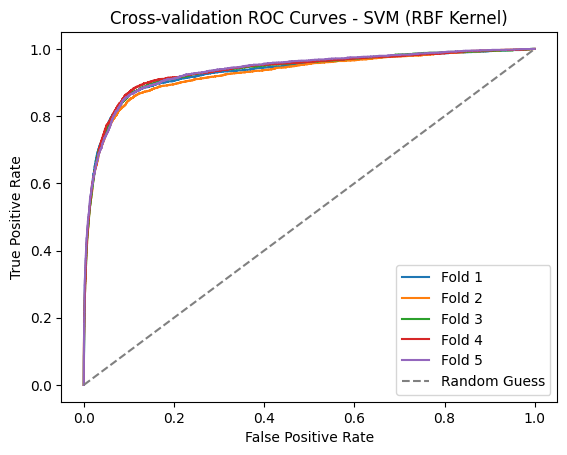

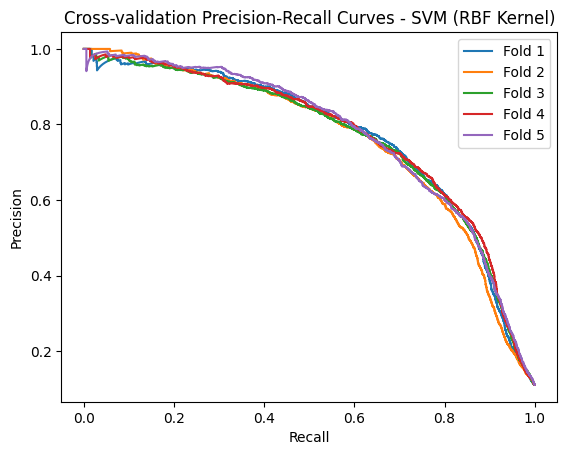


Final Training for SVM (RBF Kernel)

Final Metrics for SVM (RBF Kernel):
  Accuracy: 0.9382
  Precision: 0.7240
  Recall: 0.7150
  F1 Score: 0.7194
  ROC AUC: 0.9351
  PR AUC: 0.7778
  Class Accuracies: {'non_bankrupt': 0.9660309368957638, 'bankrupt': 0.714950634696756}


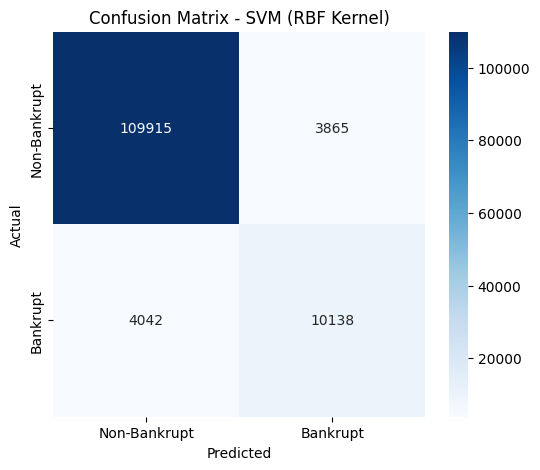

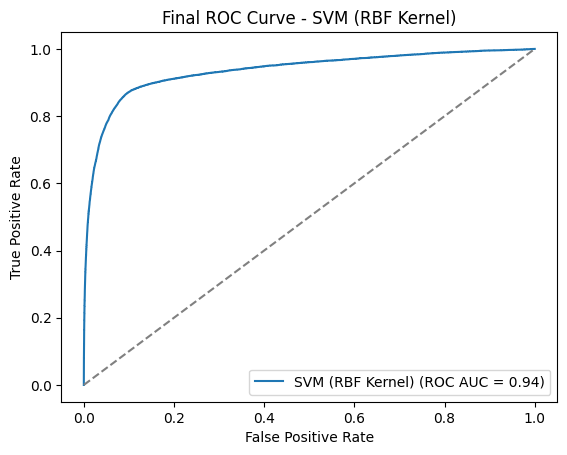

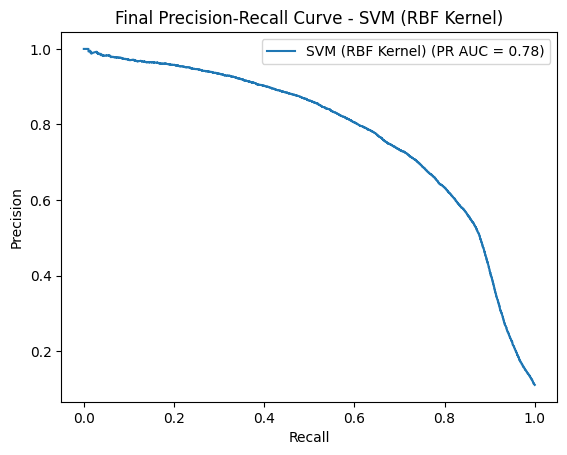

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train, y_train)):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.values[train_index], y_train.values[val_index]

        model.fit(X_fold_train, y_fold_train)

        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]
        best_threshold = 0.5
        best_f1 = 0

        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)

        # Metrics
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        class_acc = {
            "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
            "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
        }
        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Class Accuracies": class_acc
        })

        #curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

    #mean threshold
    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

# Display Cross-validation Metrics
for model_name in models.keys():
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}:")
        for metric, value in fold_metrics.items():
            if metric != "Fold" and metric != "Class Accuracies":
                print(f"    {metric}: {value:.4f}")
        print(f"    Class Accuracies: {fold_metrics['Class Accuracies']}")

    # Plot cross-validation ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title(f"Cross-validation ROC Curves - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Cross-validation Precision-Recall Curves - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Model Training and Evaluation
final_results = {}
roc_curves_final = {}
pr_curves_final = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display final metrics
    print(f"\nFinal Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

     # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save final curves
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_curves_final[model_name] = (fpr, tpr)
    pr_curves_final[model_name] = (pr_curve_precision, pr_curve_recall)

    # Plot final curves
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()






#Saving fit models

Saving

In [ ]:
import joblib
import os
os.makedirs("saved_models", exist_ok=True)
for model_name, model in models.items():
    model_path = f"/content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/{model_name}.pkl"
    joblib.dump(model, model_path)



In [ ]:
import os
loaded_models = {}
for model_name in models.keys():
    model_path = f"/content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/{model_name}.pkl"
    if os.path.exists(model_path):
        loaded_models[model_name] = joblib.load(model_path)
        print(f"{model_name} loaded from {model_path}.")
    else:
        print(f"{model_name} not found in {model_path}, please train the model.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator _SigmoidCalibration from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


SVM (RBF Kernel) loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/SVM (RBF Kernel).pkl.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CalibratedClassifierCV from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(



Evaluating SVM (RBF Kernel) on Test Data

Metrics for SVM (RBF Kernel):
  Accuracy: 0.9387
  Precision: 0.8251
  Recall: 0.5674
  F1 Score: 0.6724
  ROC AUC: 0.9351
  PR AUC: 0.7778
  Class Accuracies: {'non_bankrupt': 0.9850149411144313, 'bankrupt': 0.5674188998589563}


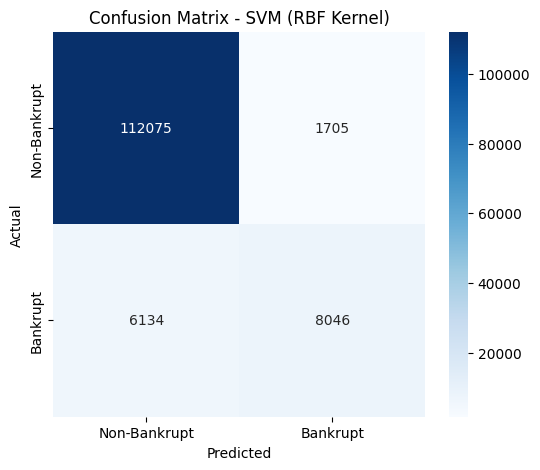

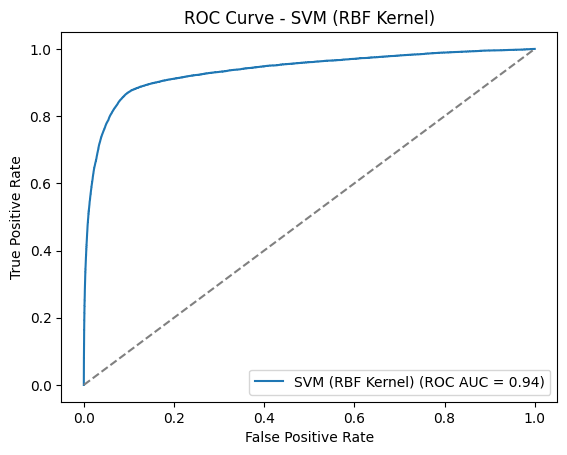

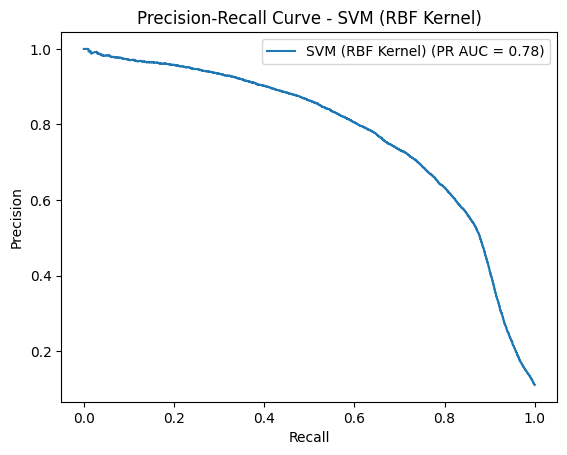

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Re-evaluate saved models
final_results = {}
pr_curves_final = {}
roc_curves_final = {}
for model_name, model in loaded_models.items():
    print(f"\nEvaluating {model_name} on Test Data")

    y_test_proba = model.predict_proba(X_test)[:, 1]  # Assuming predict_proba is available
    y_test_pred = (y_test_proba >= 0.5).astype(int)  # Default threshold 0.5

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Store results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display metrics
    print(f"\nMetrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Plot PR Curve
    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


#Feature Importance is not supported

                                              Feature  Importance
3   Profitability Ratios (Return on Investment) Ne...    0.013517
53  Liquidity Ratios (Current Liabilities − Cash)/...    0.011289
8   Profitability Ratios (Return on Investment) Gr...    0.007752
41  Activity Ratios (Assets Turnover) Sales/Total ...    0.006838
6   Profitability Ratios (Return on Investment) Gr...    0.005392
39  Activity Ratios (Assets Turnover) Sales/Total ...    0.004656
51  Liquidity Ratios (Current Liabilities − Cash)/...    0.004049
18  Structure Ratios (Total-Assets-Structure Ratio...    0.003521
17  Structure Ratios (Total-Assets-Structure Ratio...    0.003441
20  Structure Ratios (Total-Assets-Structure Ratio...    0.003000
4   Profitability Ratios (Return on Investment) Ne...    0.002622
27  Solvency Ratios Total Liabilities/Total Assets...    0.002567
33            Equity/Total Assets last available year    0.002567
50      Accounts Receivable/Total Assets last year -2    0.001805
5   Profit

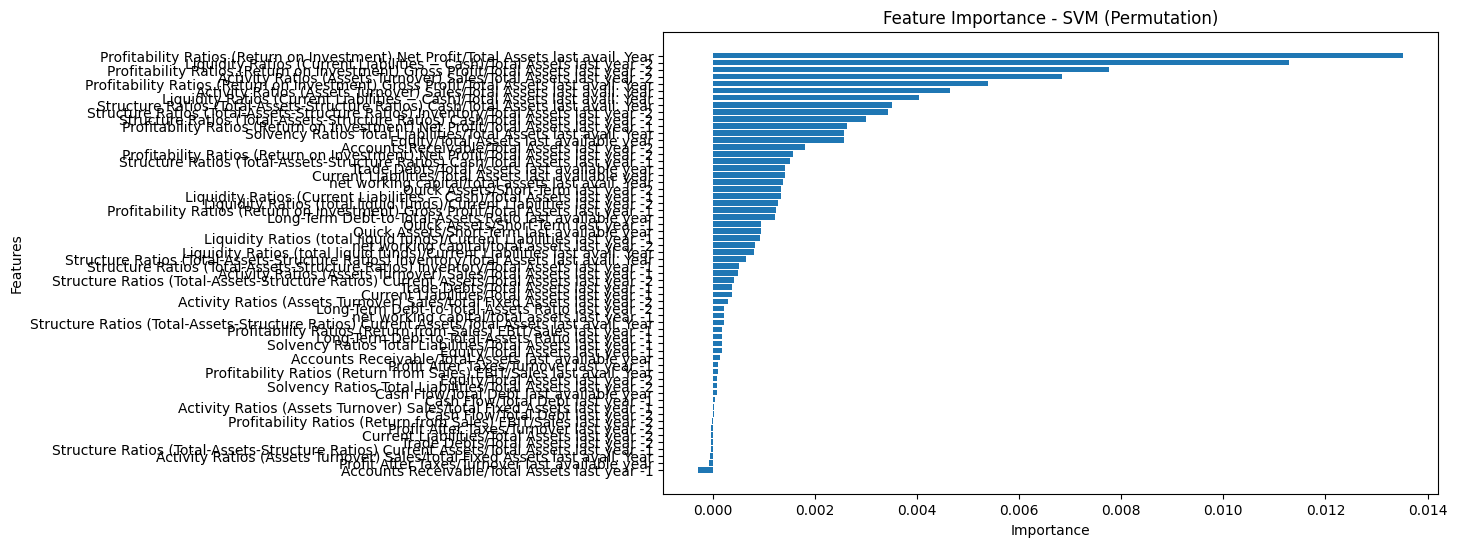

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming 'loaded_models' contains the trained model
model = loaded_models["SVM (RBF Kernel)"]

# Compute permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Feature Importance - SVM (Permutation)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
